In [1]:
from music21 import *
import pickle

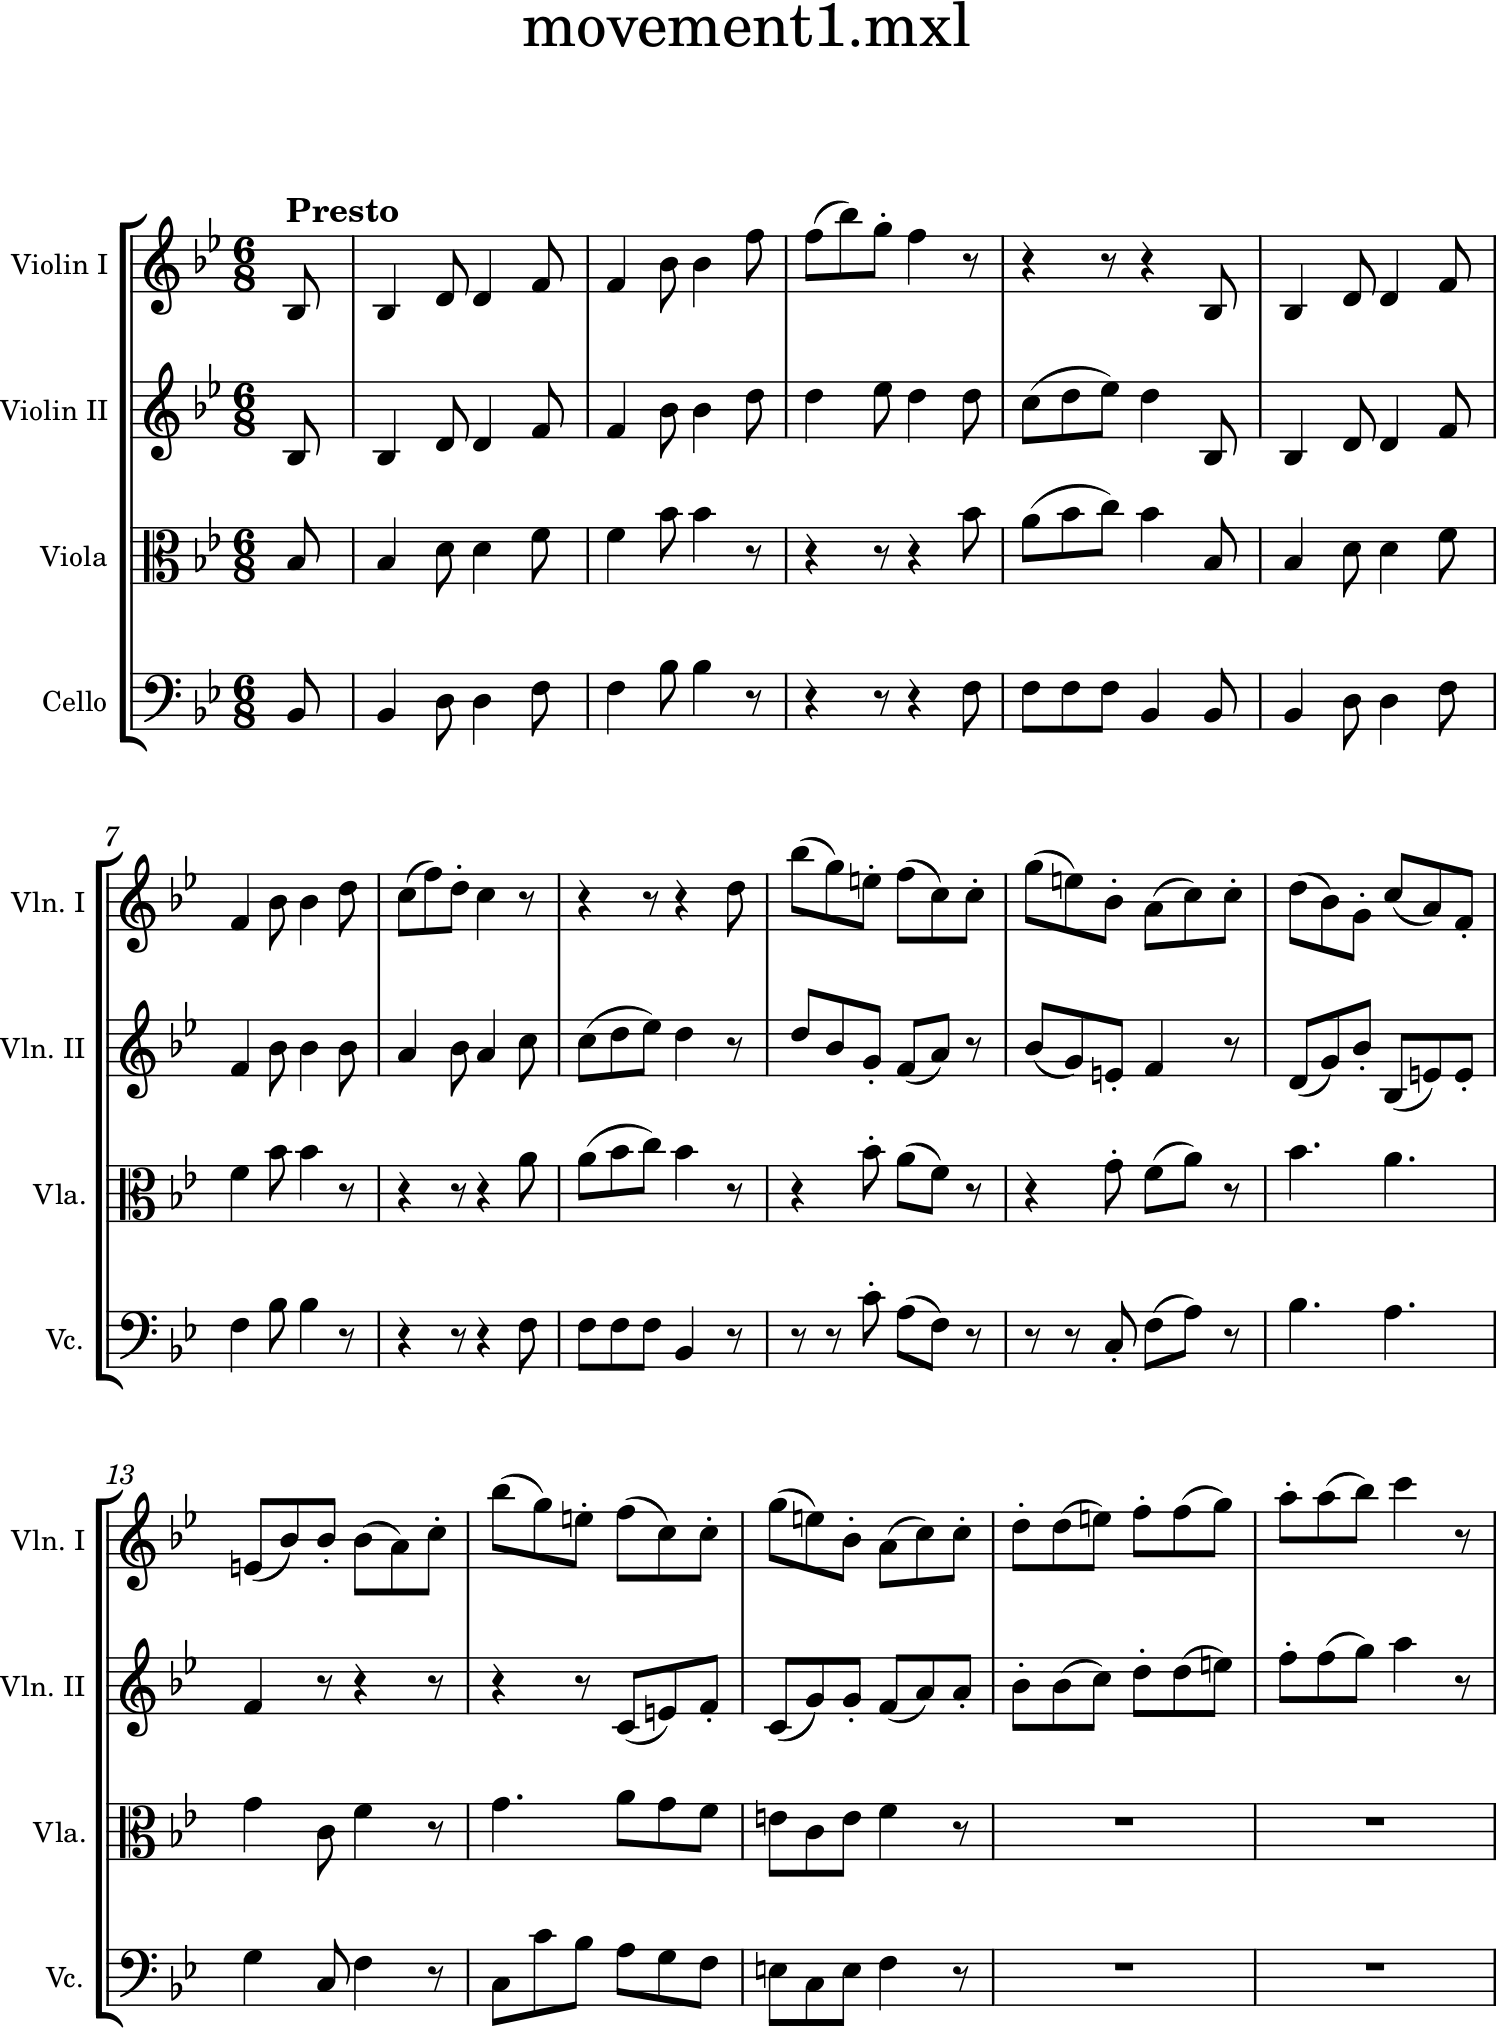

In [2]:
# sc = corpus.parse('bach/bwv66.6')
sc = corpus.parse('haydn/opus1no1/movement1.mxl')
sc.show()

In [3]:
parts_to_parse = []
for part in sc.parts:
    this_part = [] # stores the name followed by a dict of the notes
    part_notes = [] # stores the relevant data for notes and rests as a list with note, timestamp
    measure_offset = 0
    part_name = part[0].partName # Soprano, Alto, etc
    this_part.append(part_name)
    for el in part.recurse():
        running_offset = measure_offset
        if type(el) == stream.Measure:
            measure_offset = el.offset # sets the offset to the measure we have arrived to
        elif type(el) == note.Note:
            running_offset += el.offset # adds the offset the current note exists at
            part_notes.append((running_offset, el.pitch.midi)) # this is where we store the musical data we care about (this could be a tuple of info)
        elif type(el) == note.Rest:
            running_offset += el.offset # adds the offset the current note exists at
            part_notes.append((running_offset, -1)) # rests are stored as -1
    # once we've gone through all the notes in the part, we can store them in a list (where the first index is the highest part and the last is the lowest)
    this_part.append(part_notes)
    parts_to_parse.append(this_part)

print(parts_to_parse)

[['Violin I', [(0.0, 58), (0.5, 58), (1.5, 62), (2.0, 62), (3.0, 65), (3.5, 65), (4.5, 70), (5.0, 70), (6.0, 77), (6.5, 77), (7.0, 82), (7.5, 79), (8.0, 77), (9.0, -1), (9.5, -1), (10.5, -1), (11.0, -1), (12.0, 58), (12.5, 58), (13.5, 62), (14.0, 62), (15.0, 65), (15.5, 65), (16.5, 70), (17.0, 70), (18.0, 74), (18.5, 72), (19.0, 77), (19.5, 74), (20.0, 72), (21.0, -1), (21.5, -1), (22.5, -1), (23.0, -1), (24.0, 74), (24.5, 82), (25.0, 79), (25.5, 76), (26.0, 77), (26.5, 72), (27.0, 72), (27.5, 79), (28.0, 76), (28.5, 70), (29.0, 69), (29.5, 72), (30.0, 72), (30.5, 74), (31.0, 70), (31.5, 67), (32.0, 72), (32.5, 69), (33.0, 65), (33.5, 64), (34.0, 70), (34.5, 70), (35.0, 70), (35.5, 69), (36.0, 72), (36.5, 82), (37.0, 79), (37.5, 76), (38.0, 77), (38.5, 72), (39.0, 72), (39.5, 79), (40.0, 76), (40.5, 70), (41.0, 69), (41.5, 72), (42.0, 72), (42.5, 74), (43.0, 74), (43.5, 76), (44.0, 77), (44.5, 77), (45.0, 79), (45.5, 81), (46.0, 81), (46.5, 82), (47.0, 84), (48.0, -1), (48.5, 82), (48.

In [4]:
for p in parts_to_parse:
    part_name = p[0]
    with open(f'{part_name}.pickle', 'wb') as handle:
        pickle.dump(p[1], handle, protocol=4)

In [5]:
with open('Soprano.pickle', 'rb') as handle:
    unserialized_sop_data = pickle.load(handle)
with open('Alto.pickle', 'rb') as handle:
    unserialized_alto_data = pickle.load(handle)
with open('Tenor.pickle', 'rb') as handle:
    unserialized_ten_data = pickle.load(handle)
with open('Bass.pickle', 'rb') as handle:
    unserialized_bass_data = pickle.load(handle)
# print(unserialized_sop_data)
# print('------')
# print(unserialized_alto_data)
# print('------')
# print(unserialized_ten_data)
# print('------')
# print(unserialized_bass_data)

In [6]:
# sc.show('midi')

In [7]:
# sc.write("midi", "visualized_corpus.mid")

In [8]:
# sc.write("mp3", "visualized_corpus.mp3") this format is not supported by music21 yet

In [ ]:
sc.show('musicXML') # use this to change tempo to half speed